## Importing libraries and MNIST data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

#### Loading the dataset directly from keras

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

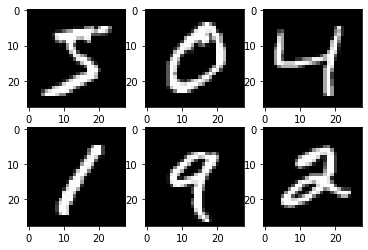

In [3]:
# checking examples:
for i in range(6):
    plt.subplot(int('23' + str(i+1)))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

## Preprocessing and normalizing the data

In [4]:
# reshape format [samples][width][height][channels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

# converting a class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# normalizing inputs
x_train = x_train /255
x_test = x_test /255

## Creating the model

In [5]:
# defining a Convolutional Neural Network model:
def create_model():
    num_classes = 10
    img_rows, img_cols = 28, 28
    model = Sequential()
    model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# # building model:
model = create_model()

## Training the model

In [6]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
print("Training done")

# saving the model:
model.save('model.h5')
print("Model saved")

Epoch 1/10
300/300 - 55s - loss: 0.2201 - accuracy: 0.9329 - val_loss: 0.0478 - val_accuracy: 0.9840
Epoch 2/10
300/300 - 53s - loss: 0.0673 - accuracy: 0.9798 - val_loss: 0.0349 - val_accuracy: 0.9884
Epoch 3/10
300/300 - 54s - loss: 0.0490 - accuracy: 0.9849 - val_loss: 0.0316 - val_accuracy: 0.9896
Epoch 4/10
300/300 - 54s - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0285 - val_accuracy: 0.9896
Epoch 5/10
300/300 - 53s - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0248 - val_accuracy: 0.9917
Epoch 6/10
300/300 - 53s - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0309 - val_accuracy: 0.9895
Epoch 7/10
300/300 - 53s - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0309 - val_accuracy: 0.9911
Epoch 8/10
300/300 - 53s - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0279 - val_accuracy: 0.9913
Epoch 9/10
300/300 - 53s - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0244 - val_accuracy: 0.9923
Epoch 10/10
300/300 - 53s - loss: 0.0163 - accuracy: 0.9942 - val_loss: 0.0250 - val_accura

## Evaluating the model

In [7]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1]*100))

CNN Error: 0.74%
